In [1]:
from preprocessing.data import get_loaders
from models.model_factory import get_model, load_weights
from results.evaluation import evaluate_model
from results.visualizations import plot_confusion_matrix, plot_roc_curves, plot_precision_recall_curve
import torch

In [2]:
def print_results(results, save_to_file = False, classes = ['COVID', 'Lung Opacity', 'Normal', 'Viral Pneumonia']):
    print("RESULTS: ")
    print("*"*30)
    print(f"Precision - macro avg: {results['precision']}")
    print(f"Recall - macro avg: {results['recall']}")
    print(f"F1-score - macro avg: {results['f1']}")
    print(f"Accuracy:  {results['acc']}")
    print("*"*30)
    print(f"Covid - metrics: {results['report']['COVID']}")
    print("*" * 30)
    print(f"Lung Opacity - metrics: {results['report']['Lung Opacity']}")
    print("*" * 30)
    print(f"Normal - metrics: {results['report']['Normal']}")
    print("*" * 30)
    print(f"Viral Pneumonia - metrics: {results['report']['Viral Pneumonia']}")

    plot_confusion_matrix(results['confusion_matrix'], class_names=classes, save_to_file=save_to_file)
    plot_roc_curves(fpr_list = results['fpr'], tpr_list = results['tpr'], roc_auc_list = results['roc_auc'], class_names=classes, save_to_file=save_to_file)
    plot_precision_recall_curve(thresholds_list=results['thresholds_pr'], precision_list=results['precision_curve'] , recall_list=results['recall_curve'], class_names=classes, save_to_file=save_to_file)


In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
_, test_loader = get_loaders('data', batch_size = 32, mean = [0.0985], std = [0.1802])

# ResNet18 

In [5]:
resnet = get_model('resnet18', in_channels = 1, num_classes = 4)
resnet = load_weights(resnet, 'resnet18_basic.pth')

In [6]:
basic_results = evaluate_model(resnet, test_loader, device, num_classes = 4)

RESULTS: 
******************************
Precision - macro avg: 0.889653384921801
Recall - macro avg: 0.9004601080071408
F1-score - macro avg: 0.8945950925116325
Accuracy:  0.8927981109799291
******************************
Covid - metrics: {'precision': 0.8136882129277566, 'recall': 0.8867403314917127, 'f1-score': 0.8486450760079313, 'support': 724.0}
******************************
Lung Opacity - metrics: {'precision': 0.8698630136986302, 'recall': 0.8445552784704904, 'f1-score': 0.8570223534373682, 'support': 1203.0}
******************************
Normal - metrics: {'precision': 0.9302093718843469, 'recall': 0.9151544874938695, 'f1-score': 0.9226205191594561, 'support': 2039.0}
******************************
Viral Pneumonia - metrics: {'precision': 0.9448529411764706, 'recall': 0.9553903345724907, 'f1-score': 0.9500924214417745, 'support': 269.0}


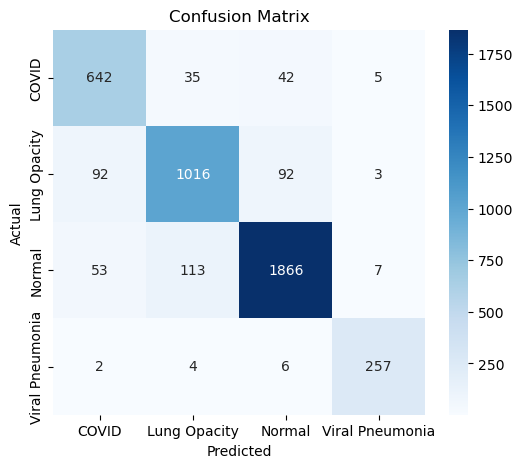

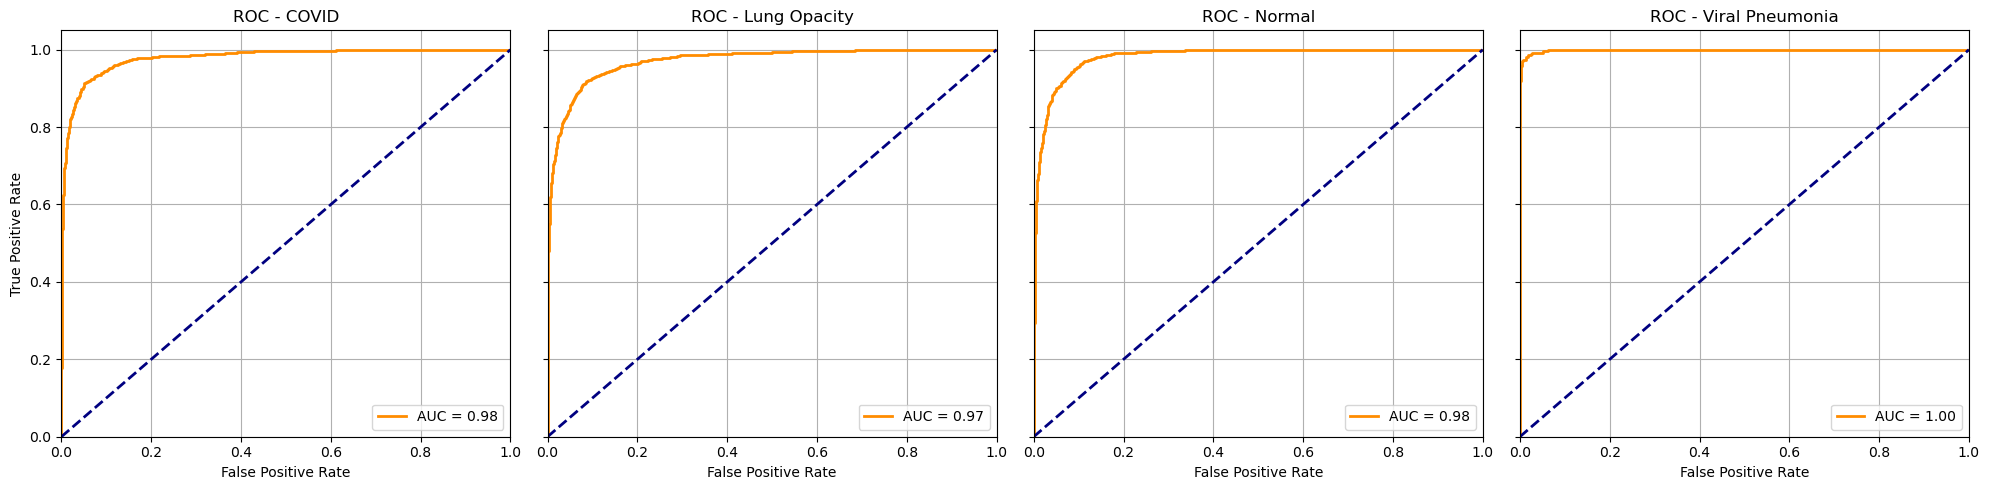

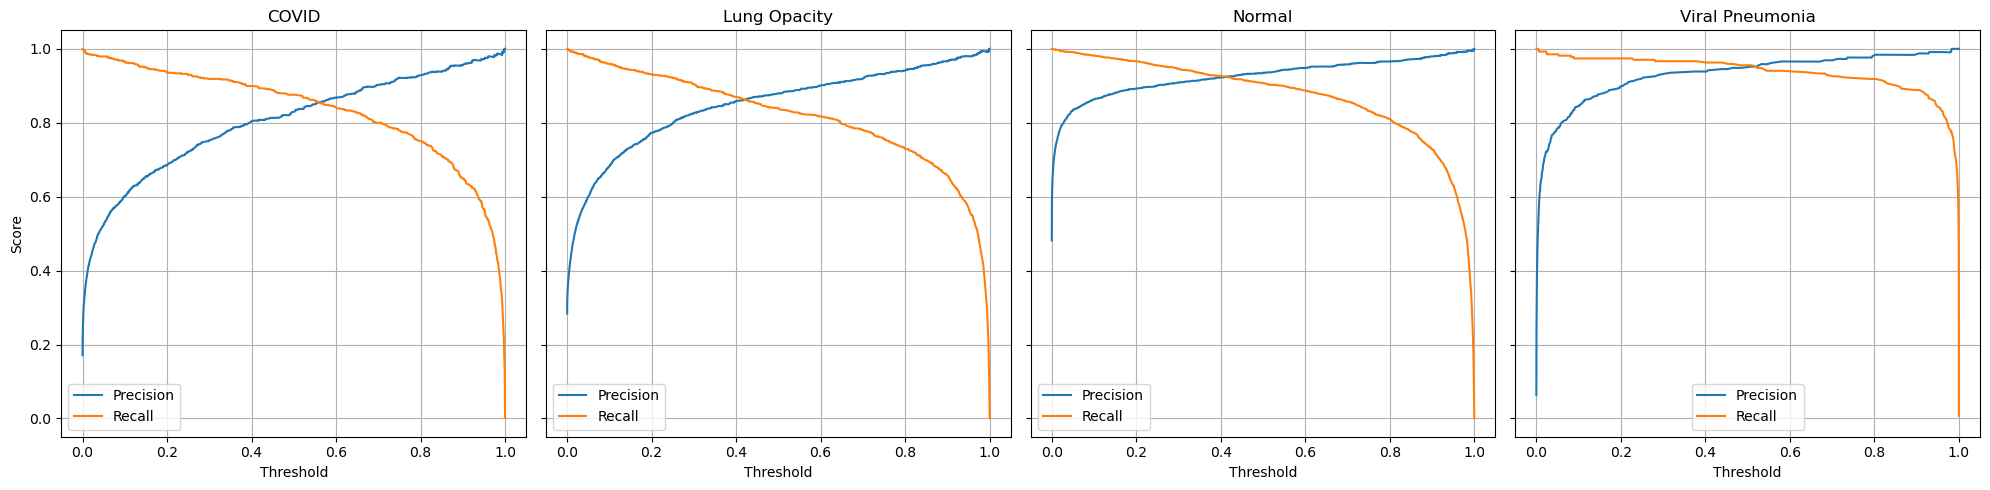

In [7]:
print_results(basic_results, save_to_file = True)

# ResNet18 + weighted loss

In [19]:
resnet_wl = get_model('resnet18', in_channels = 1, num_classes = 4)
resnet_wl = load_weights(resnet_wl, 'resnet18_weighted_loss.pth')

In [20]:
wl_results = evaluate_model(resnet_wl, test_loader, device, num_classes = 4)

RESULTS: 
******************************
Precision - macro avg: 0.8534329146020001
Recall - macro avg: 0.8894460284758079
F1-score - macro avg: 0.8638429424728936
Accuracy:  0.8630460448642266
******************************
Covid - metrics: {'precision': 0.6683070866141733, 'recall': 0.9378453038674033, 'f1-score': 0.7804597701149425, 'support': 724.0}
******************************
Lung Opacity - metrics: {'precision': 0.90234375, 'recall': 0.7680798004987531, 'f1-score': 0.8298158958239784, 'support': 1203.0}
******************************
Normal - metrics: {'precision': 0.9396325459317585, 'recall': 0.8778813143697891, 'f1-score': 0.907707910750507, 'support': 2039.0}
******************************
Viral Pneumonia - metrics: {'precision': 0.903448275862069, 'recall': 0.9739776951672863, 'f1-score': 0.9373881932021467, 'support': 269.0}


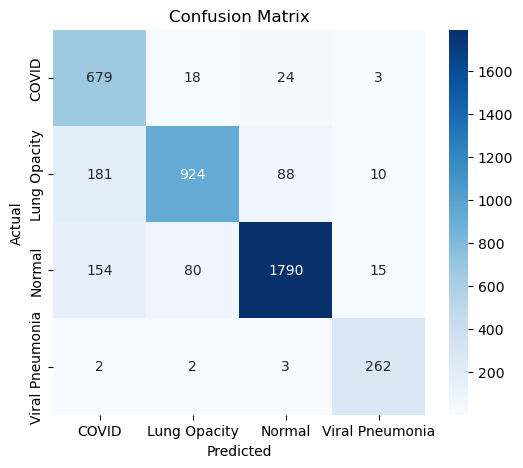

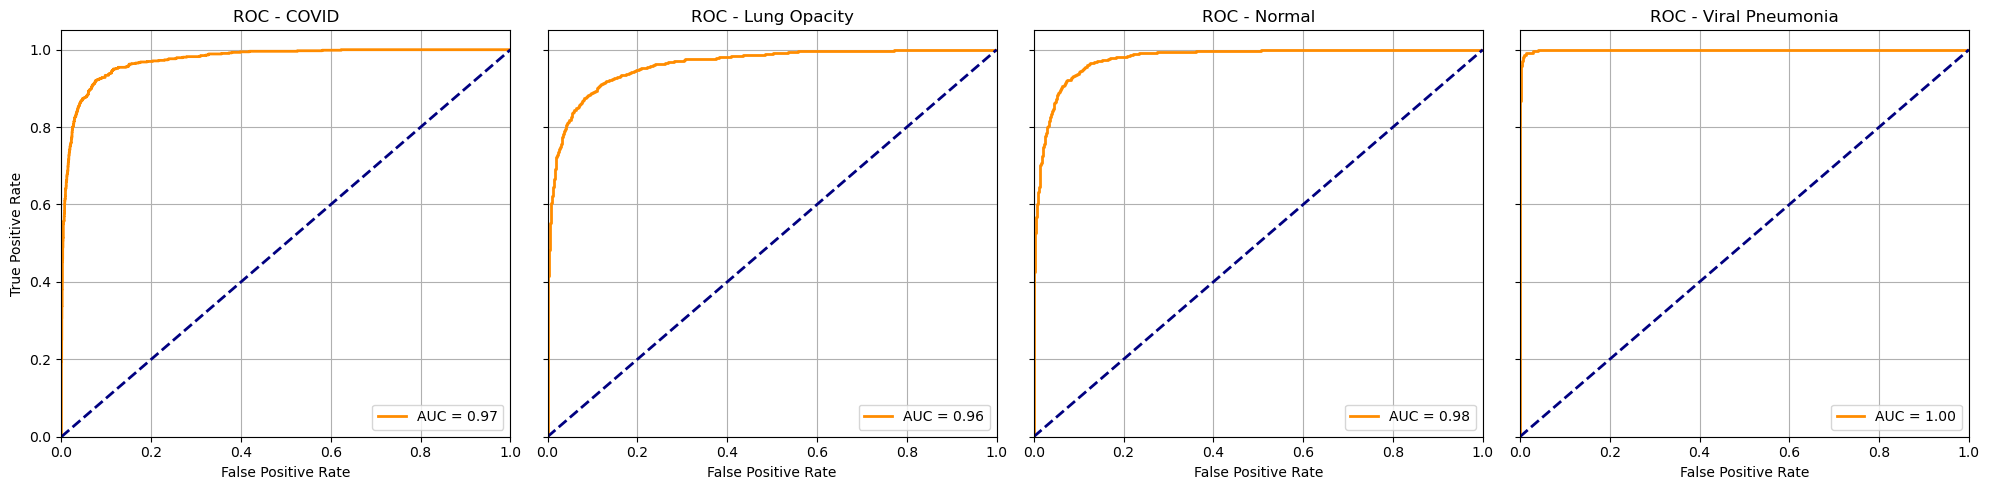

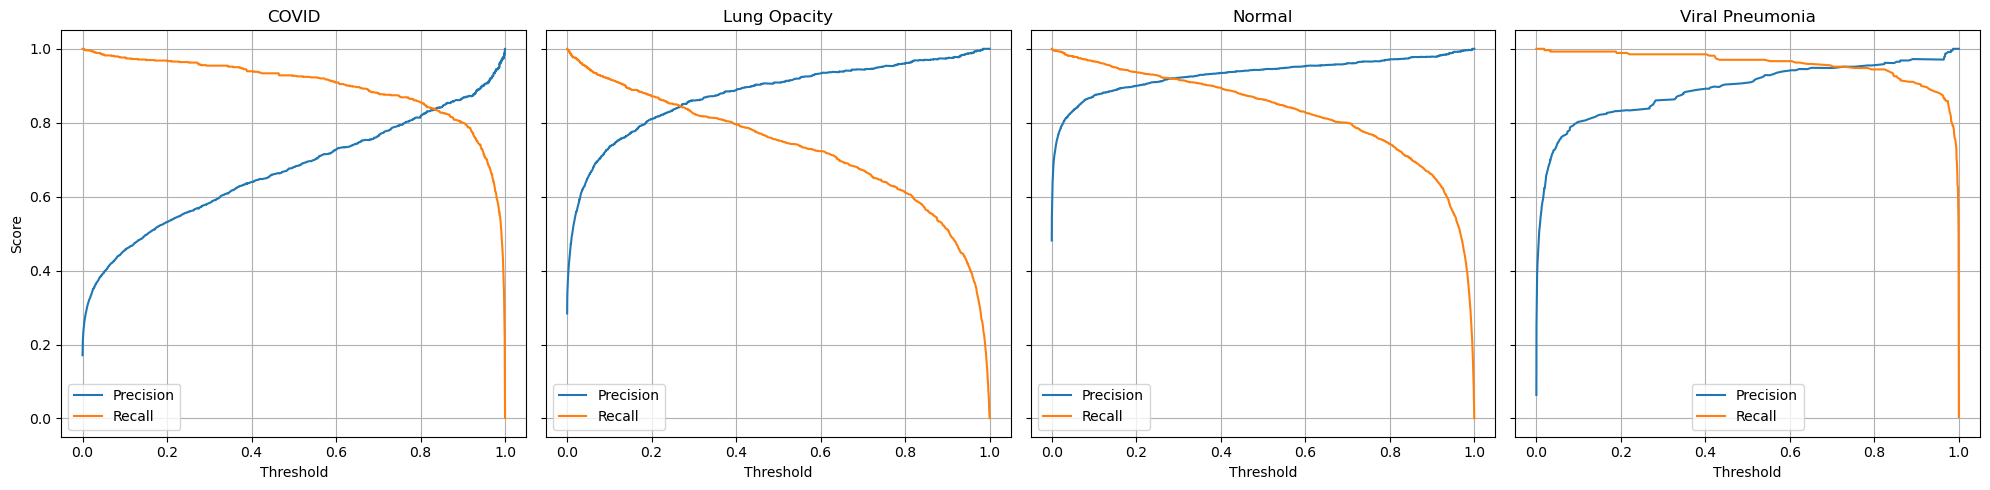

In [21]:
print_results(wl_results)

# ResNet18 + oversampling

In [22]:
resnet_ov = get_model('resnet18', in_channels = 1, num_classes = 4)
resnet_ov = load_weights(resnet_ov, 'resnet18_oversampling.pth')

In [23]:
ov_results = evaluate_model(resnet_ov, test_loader, device, num_classes = 4)

RESULTS: 
******************************
Precision - macro avg: 0.8864420132099343
Recall - macro avg: 0.9086766775856782
F1-score - macro avg: 0.8965047476764705
Accuracy:  0.895159386068477
******************************
Covid - metrics: {'precision': 0.81125, 'recall': 0.8964088397790055, 'f1-score': 0.8517060367454068, 'support': 724.0}
******************************
Lung Opacity - metrics: {'precision': 0.8884955752212389, 'recall': 0.8345802161263508, 'f1-score': 0.8606943849121304, 'support': 1203.0}
******************************
Normal - metrics: {'precision': 0.9290674603174603, 'recall': 0.9185875429131928, 'f1-score': 0.9237977805178792, 'support': 2039.0}
******************************
Viral Pneumonia - metrics: {'precision': 0.916955017301038, 'recall': 0.9851301115241635, 'f1-score': 0.9498207885304659, 'support': 269.0}


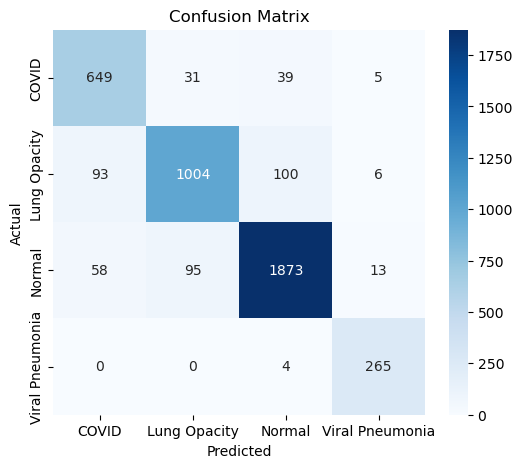

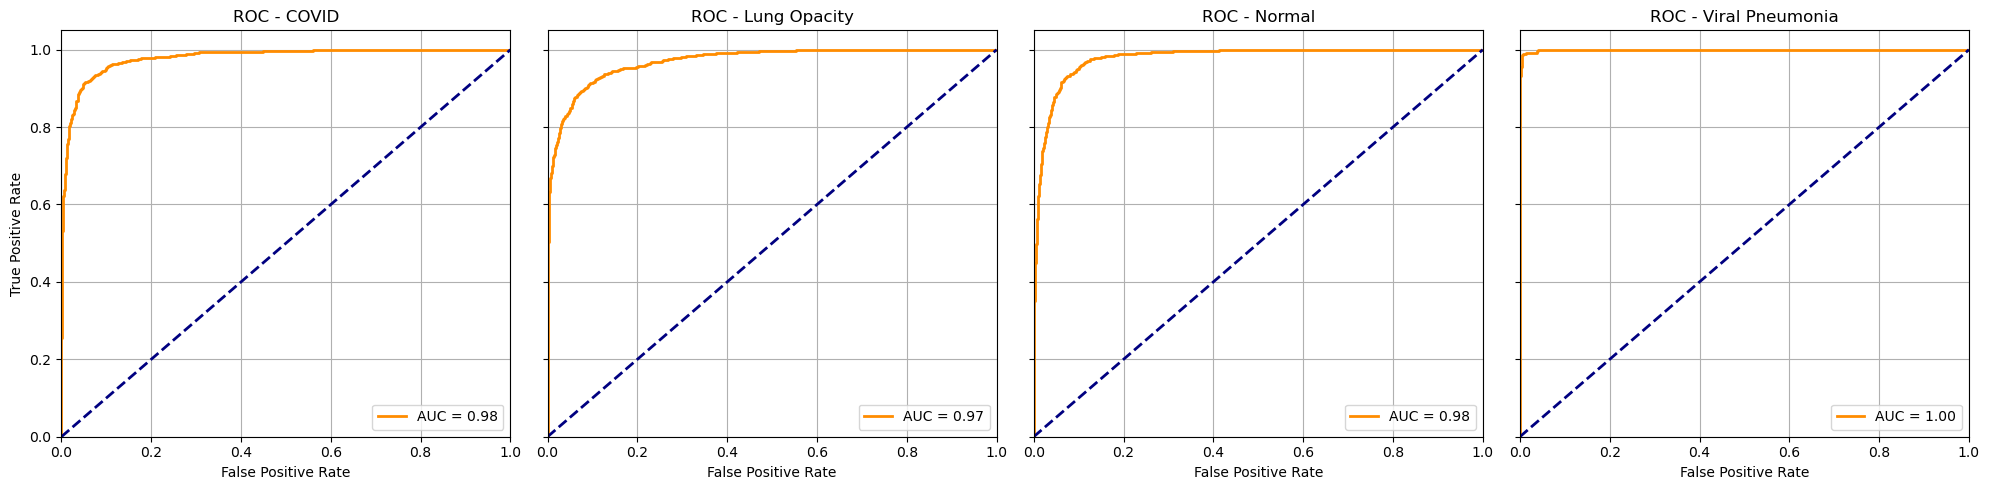

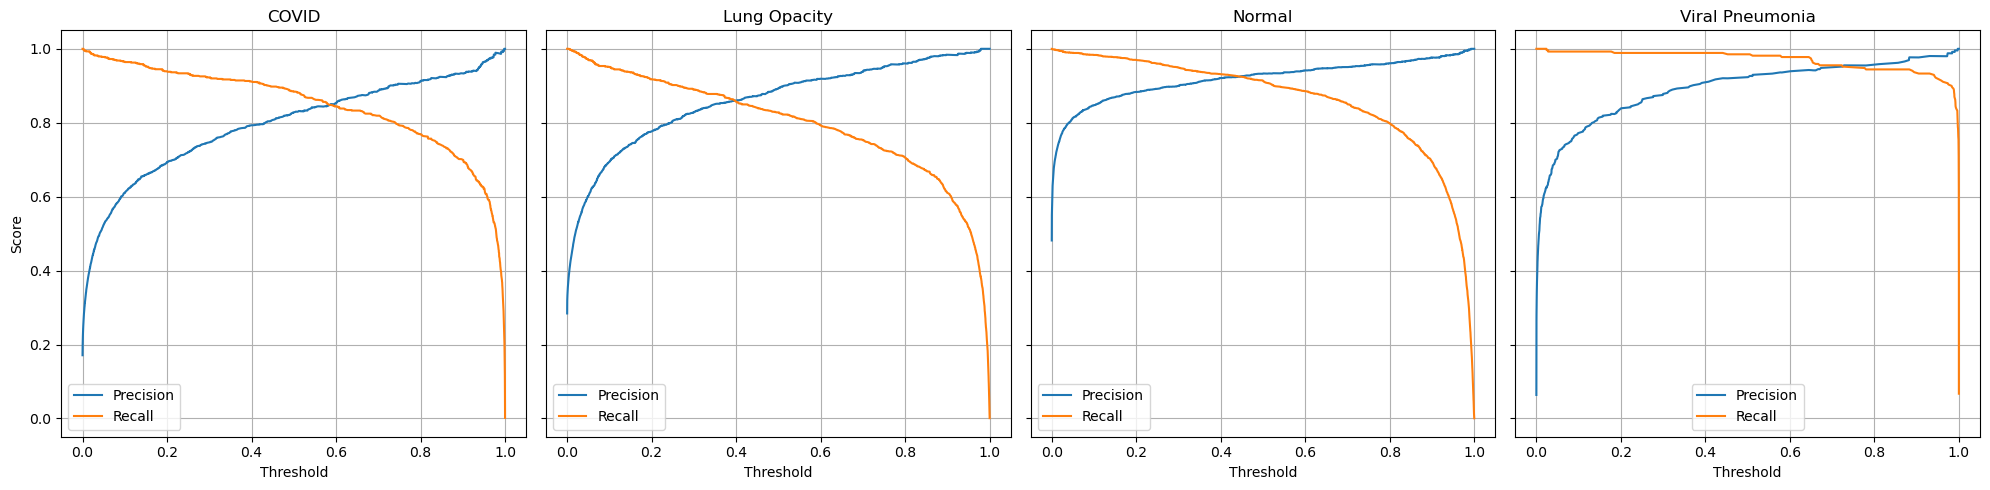

In [24]:
print_results(ov_results)

# CNN baseline

In [8]:
cnn_baseline = get_model('cnn_baseline', in_channels = 1, num_classes = 4)
cnn_baseline = load_weights(cnn_baseline, 'cnn_baseline.pth')

In [9]:
cnn_results = evaluate_model(cnn_baseline, test_loader, device, num_classes = 4)

RESULTS: 
******************************
Precision - macro avg: 0.7813961712758575
Recall - macro avg: 0.817762925880761
F1-score - macro avg: 0.7963168767960547
Accuracy:  0.7966942148760331
******************************
Covid - metrics: {'precision': 0.5663716814159292, 'recall': 0.7071823204419889, 'f1-score': 0.628992628992629, 'support': 724.0}
******************************
Lung Opacity - metrics: {'precision': 0.8134263295553618, 'recall': 0.7755610972568578, 'f1-score': 0.7940425531914893, 'support': 1203.0}
******************************
Normal - metrics: {'precision': 0.8872340425531915, 'recall': 0.8180480627758705, 'f1-score': 0.8512375606021945, 'support': 2039.0}
******************************
Viral Pneumonia - metrics: {'precision': 0.8585526315789473, 'recall': 0.9702602230483272, 'f1-score': 0.9109947643979057, 'support': 269.0}


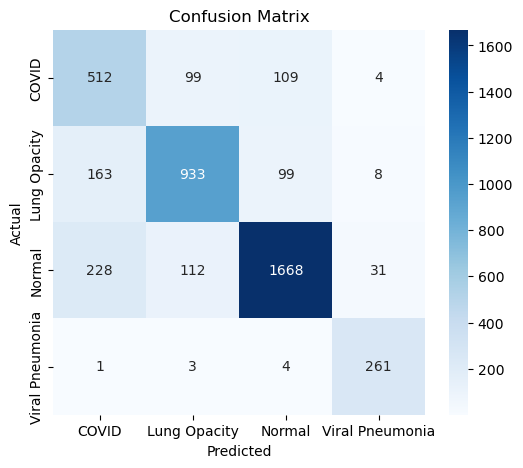

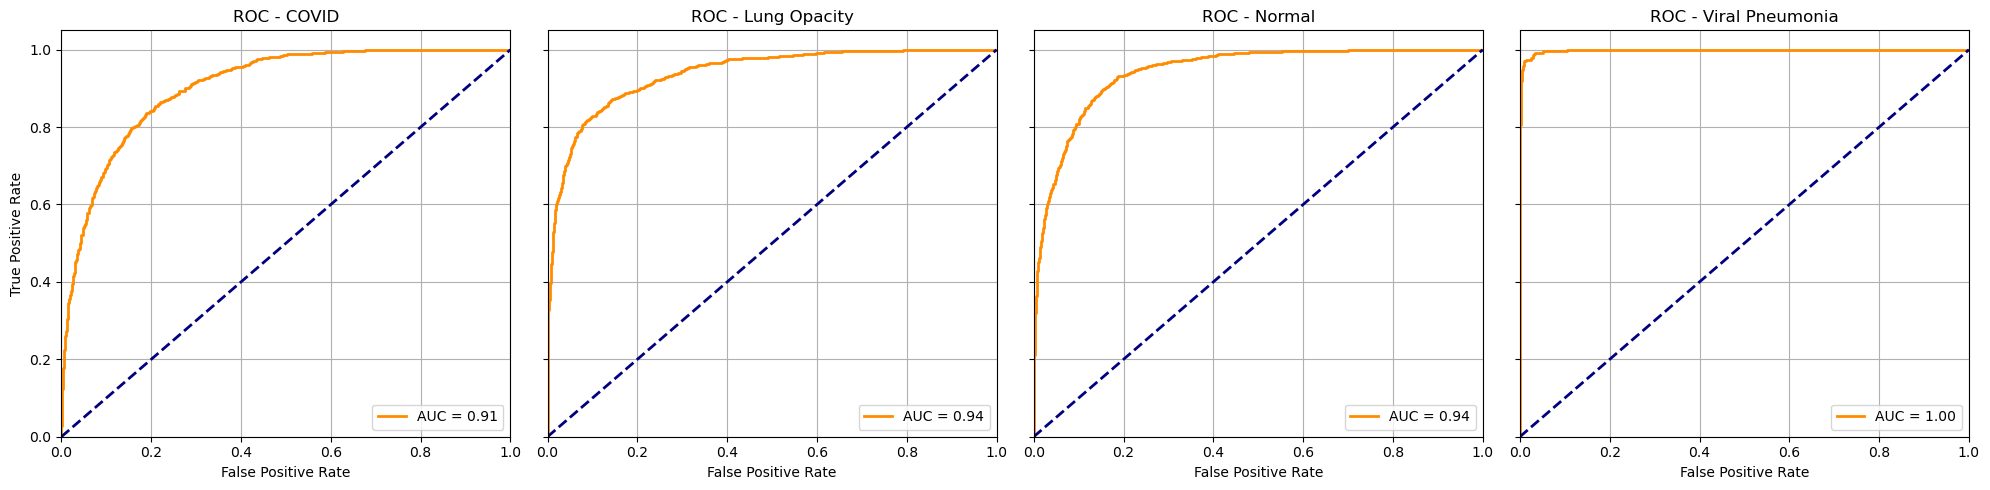

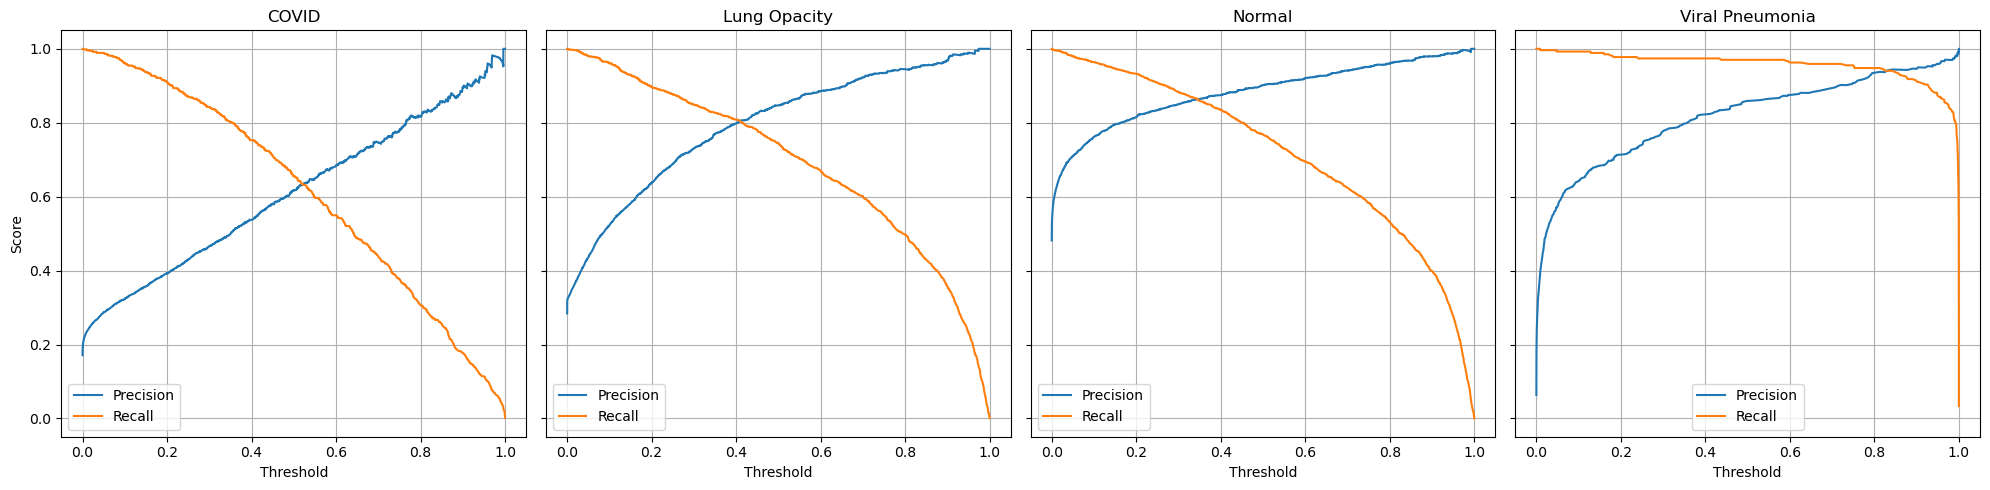

In [10]:
print_results(cnn_results)

# Conclusions:

As expected, **ResNet18** outperformed the custom **CNN Baseline**, achieving a solid score of nearly **0.9 F1 Score**.

Imbalanced dataset fixing techniques like **oversampling** or **weighted loss** didn't improve the model's performance.  
This might be because the minority class was actually the easiest for all models to classify,  